 ## $\underline{ \textbf{Data Assimilation Problem For Pitch And Plung Airfoil (PAPA)}}$
 
 
 
 **Statut** : **OK**
 
**Purpose**: We propose here an assimilation problem whose goal is to infer the initial conditions of the PAPA system from observations made on the pitch and heave.
 
 
 **Reference** : 
 
 [1] : [ V. Mons, J.-C. Chassaing, T. Gomez, P. Sagaut, "Reconstruction of unsteady viscous flows using data assimilation schemes", JCP 316 (2016) p. 255-280.](https://dropsu.sorbonne-universite.fr/s/oP8s9CeNS5zW5DG)
 
 [2] : [ A. Chaarane, "Data Assimilation for Flow Induced Vibrations",Stage, InstitutJean Le Rond D’Alembert, 2021.](https://dropsu.sorbonne-universite.fr/s/kr97PiKoJ8jFHfw)
 
 
-----------------------------------
**A. Chaarane**, Institute  D'Alembert, (24 Jan 2022)

-----------------------------------

In [1]:
class Config_InitCond:
    pass

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import sys

# ------ Importation Local
PATH_DATA = "../../DATA/DA_4DEnVar_V1/PAPA_LCO/InitCond/"
PATH_CONF = "../../Inference_Problem/PAPA_LCO/"
sys.path.append(PATH_CONF)

sys.path.append("../")
from Post_Trait import POSTRAIT

PST = POSTRAIT(PATH_DATA)

### Configuration of the DA problem

In this example, the assimilation problem is used as an inverse solution method to determine the position and initial velocity of the profile. The observations were made on the aerodynamic forces, lift and momentum, every 2 step time  in the time interval [ 0., 250]. The reference and initialization control vectors are defined in the table below along with the observation and ensemble parameters.

In [3]:
PST.show_cfg()

-------------------------------------------------------------------------------------------------------------------
                                                Parametres                                         
--------------------------------------------------------------------------------------------------------------------
     Modele name      :                   PAPA_LCO                
     DA Method        :                   4DEnVar (V1)        
     Uncertains param :                                                       
                  name     : a0_deg   h0   da0_deg   dh0
                 reference : a0_deg = 2   h0 = 1   da0_deg = 0.5   dh0 = 0.0   
                 estimate  : a0_deg = 0   h0 = 0   da0_deg = -1   dh0 = 0.0   
                                                                         
     Nbr Iteration =  10  |  Nbr Ensemble =   30  | Param_sigma = 0.300000
                                                                         
     Observations  

### Function Cost


$\newcommand{\Gama}{\boldsymbol{\gamma}} 
\newcommand{\B}{\boldsymbol{B}} 
\newcommand{\C}{\boldsymbol{C}} 
\newcommand{\Gamae}{\boldsymbol{\gamma}^{(e)}}
\newcommand{\YN}{( \boldsymbol{y}{_k})_{0\leq k\leq N}}
\newcommand{\XN}{( \boldsymbol{x}{_k})_{0\leq k\leq N}}
\newcommand{\Ep}{ \boldsymbol{E}'}
\newcommand{\Beta}{ \boldsymbol{\beta}}
\newcommand{\h}{ \boldsymbol{h}}
\newcommand{\x}{ \boldsymbol{x}}
\newcommand{\y}{ \boldsymbol{y}}$

The DA framework addressed in this study is to infer the control vector $\Gama$ assuming that observations $\boldsymbol{y}$  are given by
$\boldsymbol{y}=\boldsymbol{h}(\boldsymbol{x}) +\boldsymbol{\epsilon}^0 $, with $\h$  the observation operator and $\boldsymbol{\epsilon}^0$  the measurement error.
If the model is supposed to be exact,  the control vector is sought as a solution which minimises the following cost function

\begin{align}
J(\Gama) &= \; \frac{1}{2} \Vert \h\big(\x (\Gama)\big) - \y \Vert^2_{\C^{-1}} 
%\textbf{Grad}_{obs} &=\sum_{n=0}^{N} \boldsymbol{H}_k '^T \C^{-1}\boldsymbol{d}\\
%\textbf{Hess}_{obs}&=\sum_{n=0}^{N} \boldsymbol{H}_k '^T \C^{-1}\boldsymbol{H}_k '
\end{align}

where $\C$ denotes the covariance matrix of the measurement error and $ \Vert \cdot \Vert ^2_{\C^{-1}} = \cdot ^T \C ^{-1} \cdot$.

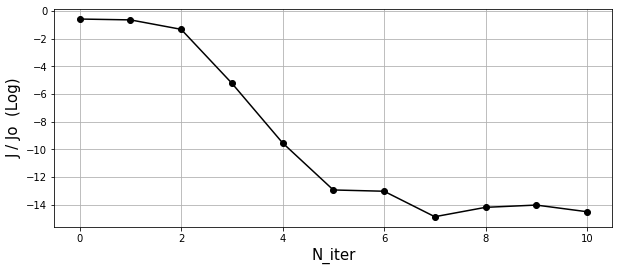

In [4]:
plt.figure(figsize=(10,4))
PST.plot_Jcost()

Here we plot the cost function $J$ as a function of the number of iterations, we plot the logarithm of ($J/J_0$) where $J_0$ is the cost caculated with the initialization vector.  We can see that the latter decreases with each iteration and starts to converge around the 5th iteration. Here we have deactivated the breaking criterion to see the saturation of the cost function. 

### Control Vectors  

In [5]:
PST.show_param_ref_opti_est(True)

+----------------+----------+------+-----------+--------------+
|                |   a0_deg |   h0 |   da0_deg |          dh0 |
+================+==========+======+===========+==============+
| Reference      |        2 |    1 |       0.5 |  0           |
+----------------+----------+------+-----------+--------------+
| Initialisation |        0 |    0 |      -1   |  0           |
+----------------+----------+------+-----------+--------------+
| Optimized      |        2 |    1 |       0.5 | -1.62102e-11 |
+----------------+----------+------+-----------+--------------+


The optimized vector presented here is the control vector obtained with the DA optimization in the last Iteration, we see that it is equal to the reference with an accuracy of about $10^{-11}$. This shows that our assimilation method is very efficient.

### Reconstruction of airfoil oscillations. 

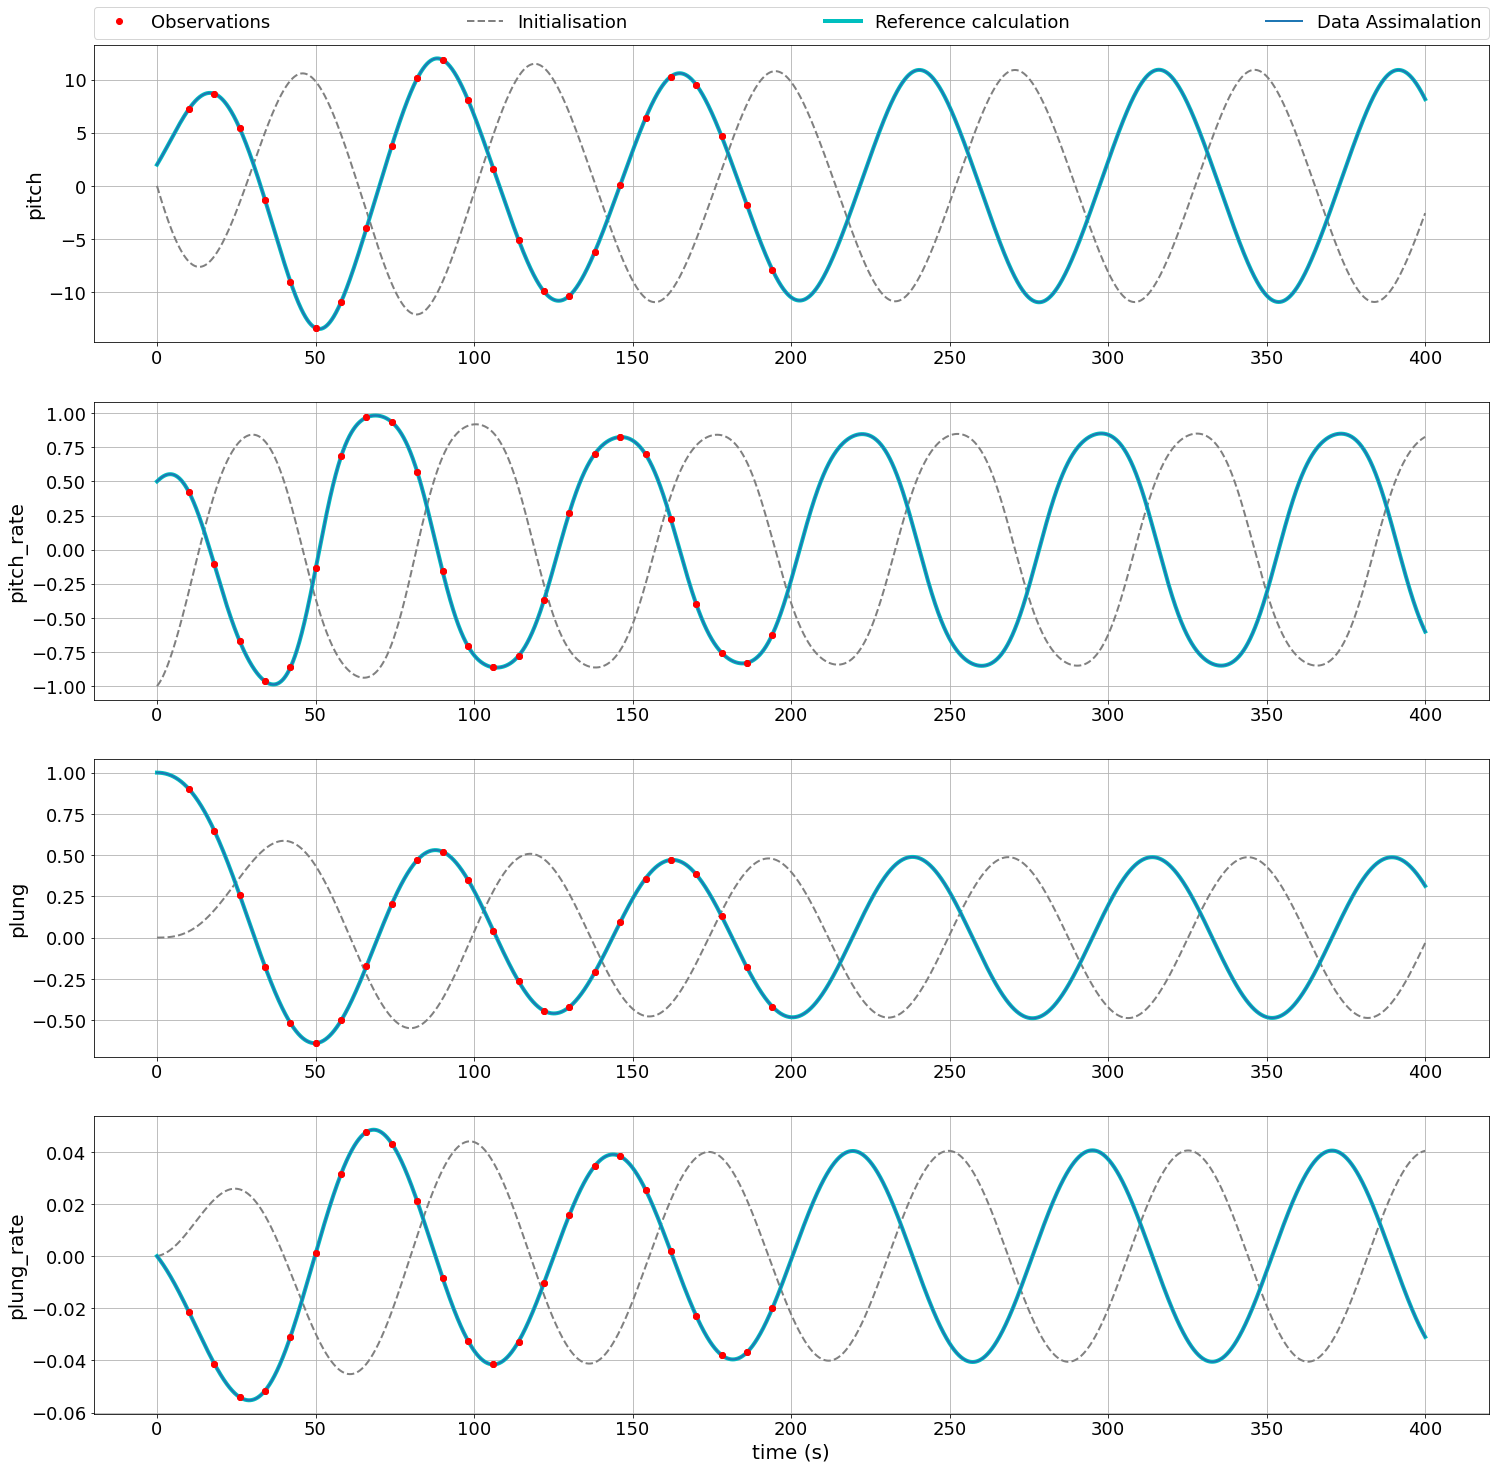

In [6]:
plt.figure(figsize=(25,150))
PST.plot_obs_ref_est_opt()

We have represented the reconstruction of the coefficients of the aerodynamic forces as a function of time. We have in red the observations, in grey the initial calculation which is very far from the reference solution which is in cyan color. We can see that after the optimization process we manage to reconstruct perfectly the displacements of the profile by passing over the observations and which are almost equal to the reference state at long times. 